# Set-up

## Get Data from Kaggle

In [1]:
#import kagglehub
#import os
#import shutil

#current_directory = os.getcwd()
#path = kagglehub.dataset_download("adamamer2001/yelp-complete-open-dataset-2024")
#dataset_path = os.path.join(path, "yelp_dataset") 
#for root, dirs, files in os.walk(dataset_path):
#    for file in files:
#        if file.endswith(".json"):
#            shutil.move(os.path.join(root, file), os.path.join(current_directory, file))

#print("Path to .json dataset files:", current_directory)


In [2]:
#import os
#import shutil

#directory_path = "/home/tindrieri/private/1/"

#if os.path.exists(directory_path):
#    for file_name in os.listdir(directory_path):
#        file_path = os.path.join(directory_path, file_name)
#        if os.path.isfile(file_path):
#            os.remove(file_path)
#        elif os.path.isdir(file_path):
#            shutil.rmtree(file_path) 

#    print(f"All files in {directory_path} have been deleted.")
#else:
#    print(f"The directory {directory_path} does not exist.")

## Import Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

## Get Data

In [5]:
file_path = 'yelp_academic_dataset_business.json'

df_business_data = pd.read_json(file_path, lines=True)
print(df_business_data.head())

              business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   
2  32.223236 -110.880452    3.5            22        0   
3  39.9555

In [6]:
file_path = 'yelp_academic_dataset_checkin.json'

df_checkin_data = pd.read_json(file_path, lines=True)
print(df_checkin_data.head())

              business_id                                               date
0  ---kPU91CF4Lq2-WlRu9Lw  2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020...
1  --0iUa4sNDFiZFrAdIWhZQ  2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011...
2  --30_8IhuyMHbSOcNWd6DQ           2013-06-14 23:29:17, 2014-08-13 23:20:22
3  --7PUidqRWpRSpXebiyxTg  2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012...
4  --7jw19RH9JKXgFohspgQw  2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014...


In [7]:
file_path = 'yelp_academic_dataset_review.json'

chunk_size = 100000
chunks = []
for chunk in pd.read_json(file_path, lines=True, chunksize=chunk_size):
    chunks.append(chunk)

df_review_data = pd.concat(chunks, ignore_index=True)

print(df_review_data.head())

                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0      3       0      0     0   
1      5       1      0     1   
2      3       0      0     0   
3      5       1      0     1   
4      4       1      0     1   

                                                text                date  
0  If you decide to eat here, just be aware it is... 2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year... 2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm... 2014-02-05 20:30:30  
3  Wow!  Yummy, different,  delicious.

In [8]:
file_path = 'yelp_academic_dataset_tip.json'

df_tip_data = pd.read_json(file_path, lines=True)
print(df_tip_data.head())

                  user_id             business_id  \
0  AGNUgVwnZUey3gcPCJ76iw  3uLgwr0qeCNMjKenHJwPGQ   
1  NBN4MgHP9D3cw--SnauTkA  QoezRbYQncpRqyrLH6Iqjg   
2  -copOvldyKh1qr-vzkDEvw  MYoRNLb5chwjQe3c_k37Gg   
3  FjMQVZjSqY8syIO-53KFKw  hV-bABTK-glh5wj31ps_Jw   
4  ld0AperBXk1h6UbqmM80zw  _uN0OudeJ3Zl_tf6nxg5ww   

                                                text                date  \
0                     Avengers time with the ladies. 2012-05-18 02:17:21   
1  They have lots of good deserts and tasty cuban... 2013-02-05 18:35:10   
2             It's open even when you think it isn't 2013-08-18 00:56:08   
3                          Very decent fried chicken 2017-06-27 23:05:38   
4             Appetizers.. platter special for lunch 2012-10-06 19:43:09   

   compliment_count  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  


In [9]:
file_path = 'yelp_academic_dataset_user.json'


chunk_size = 100000
chunks = []
for chunk in pd.read_json(file_path, lines=True, chunksize=chunk_size):
    chunks.append(chunk)

df_user_data = pd.concat(chunks, ignore_index=True)

print(df_user_data.head())

                  user_id    name  review_count        yelping_since  useful  \
0  qVc8ODYU5SZjKXVBgXdI7w  Walker           585  2007-01-25 16:47:26    7217   
1  j14WgRoU_-2ZE1aw1dXrJg  Daniel          4333  2009-01-25 04:35:42   43091   
2  2WnXYQFK0hXEoTxPtV2zvg   Steph           665  2008-07-25 10:41:00    2086   
3  SZDeASXq7o05mMNLshsdIA    Gwen           224  2005-11-29 04:38:33     512   
4  hA5lMy-EnncsH4JoR-hFGQ   Karen            79  2007-01-05 19:40:59      29   

   funny   cool                                              elite  \
0   1259   5994                                               2007   
1  13066  27281  2009,2010,2011,2012,2013,2014,2015,2016,2017,2...   
2   1010   1003                           2009,2010,2011,2012,2013   
3    330    299                                     2009,2010,2011   
4     15      7                                                      

                                             friends  fans  ...  \
0  NSCy54eWehBJyZdG2iE84w, pe42

# Data Exploration

## Helper methods

In [10]:
def print_num_cols(df):
    """
    Get number of columns
    """
    num_cols = len(df.columns)
    print('There is a total of %d columns' % num_cols)

In [11]:
def print_num_missing(df):
    """
    Get number of missing values for each column
    """
    columns = df.columns
    num_cols = len(columns)
    for i in range(num_cols):
        missing = df[columns[i]].isnull().sum()
        print("'{}' column has {} missing values".format(columns[i], missing))

In [12]:
def print_types(df):
    """
    """
    data_types = df.dtypes
    columns = df.columns
    num_cols = len(columns)
    for i in range(num_cols):
        print("'%s' column is of type '%s'" % (columns[i], data_types.iloc[i]))

## List of DFs
* df_business_data
* df_checkin_data
* df_review_data
* df_tip_data
* df_user_data

### Business Data

In [12]:
num_business = len(df_business_data)
print('There is a total of %s businesses' % num_business)

There is a total of 150346 businesses


In [13]:
df_business_data.describe()

,latitude,longitude,stars,review_count,is_open
count,150346.000000,150346.000000,150346.000000,150346.000000,150346.00000
mean,36.671150,-89.357339,3.596724,44.866561,0.79615
std,5.872759,14.918502,0.974421,121.120136,0.40286
min,27.555127,-120.095137,1.000000,5.000000,0.00000
25%,32.187293,-90.357810,3.000000,8.000000,1.00000
50%,38.777413,-86.121179,3.500000,15.000000,1.00000
75%,39.954036,-75.421542,4.500000,37.000000,1.00000
max,53.679197,-73.200457,5.000000,7568.000000,1.00000


In [14]:
print_num_cols(df_business_data)

There is a total of 14 columns


In [15]:
print_num_missing(df_business_data)

'business_id' column has 0 missing values
'name' column has 0 missing values
'address' column has 0 missing values
'city' column has 0 missing values
'state' column has 0 missing values
'postal_code' column has 0 missing values
'latitude' column has 0 missing values
'longitude' column has 0 missing values
'stars' column has 0 missing values
'review_count' column has 0 missing values
'is_open' column has 0 missing values
'attributes' column has 13744 missing values
'categories' column has 103 missing values
'hours' column has 23223 missing values


In [16]:
print_types(df_business_data)

'business_id' column is of type 'object'
'name' column is of type 'object'
'address' column is of type 'object'
'city' column is of type 'object'
'state' column is of type 'object'
'postal_code' column is of type 'object'
'latitude' column is of type 'float64'
'longitude' column is of type 'float64'
'stars' column is of type 'float64'
'review_count' column is of type 'int64'
'is_open' column is of type 'int64'
'attributes' column is of type 'object'
'categories' column is of type 'object'
'hours' column is of type 'object'


In [17]:
df_business_data = df_business_data.astype({
    "business_id": str,
    "name": str,
    "address": str,
    "city": str,
    "state": str,
    "postal_code": str,
    "is_open": bool,
    "attributes": str,
    "categories": str,
    "hours": str
})

### Check In Data

In [18]:
num_checkin = len(df_checkin_data)
print('There is a total of %s check-ins' % num_checkin)

There is a total of 131930 check-ins


### Review Data

In [19]:
num_reviews = len(df_review_data)
print('There is a total of %s reviews' % num_reviews)

There is a total of 6990280 reviews


In [20]:
df_review_data.describe()

,stars,useful,funny,cool,date
count,6.990280e+06,6.990280e+06,6.990280e+06,6.990280e+06,6990280
mean,3.748584e+00,1.184609e+00,3.265596e-01,4.986175e-01,2017-01-11 11:22:33.441780992
min,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,2005-02-16 03:23:22
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015-01-25 04:53:50.249999872
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2017-06-03 01:26:07
75%,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2019-05-23 00:02:46.249999872
max,5.000000e+00,1.182000e+03,7.920000e+02,4.040000e+02,2022-01-19 19:48:45
std,1.478705e+00,3.253767e+00,1.688729e+00,2.172460e+00,NaN


In [21]:
print_num_cols(df_review_data)

There is a total of 9 columns


In [22]:
print_num_missing(df_review_data)

'review_id' column has 0 missing values
'user_id' column has 0 missing values
'business_id' column has 0 missing values
'stars' column has 0 missing values
'useful' column has 0 missing values
'funny' column has 0 missing values
'cool' column has 0 missing values
'text' column has 0 missing values
'date' column has 0 missing values


In [23]:
print_types(df_review_data)

'review_id' column is of type 'object'
'user_id' column is of type 'object'
'business_id' column is of type 'object'
'stars' column is of type 'int64'
'useful' column is of type 'int64'
'funny' column is of type 'int64'
'cool' column is of type 'int64'
'text' column is of type 'object'
'date' column is of type 'datetime64[ns]'


In [24]:
df_review_data = df_review_data.astype({
    "review_id": str,
    "user_id": str,
    "business_id": str,
    "text": str
})

### Tip Data

In [25]:
num_tips = len(df_tip_data)
print('There is a total of %s tips' % num_tips)

There is a total of 908915 tips


### User Data

In [26]:
num_users = len(df_user_data)
print('There is a total of %s users' % num_users)

There is a total of 1987897 users


In [27]:
df_user_data.describe()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06
mean,2.339441e+01,4.229634e+01,1.697054e+01,2.379291e+01,1.465740e+00,3.630494e+00,1.807072e+00,2.922631e-01,1.793176e-01,1.336493e-01,6.390723e-02,1.443135e+00,3.011841e+00,2.829308e+00,2.829308e+00,1.056448e+00,1.226859e+00
std,8.256699e+01,6.414806e+02,4.078034e+02,5.653513e+02,1.813075e+01,1.183337e+00,7.360184e+01,1.282467e+01,1.515525e+01,1.135682e+01,1.004363e+01,6.016790e+01,1.193898e+02,9.666385e+01,9.666385e+01,3.217973e+01,9.515751e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.880000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.700000e+01,1.300000e+01,2.000000e+00,3.000000e+00,0.000000e+00,4.560000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.747300e+04,2.062960e+05,1.858230e+05,1.998780e+05,1.249700e+04,5.000000e+00,2.578400e+04,1.350100e+04,1.418000e+04,1.365400e+04,1.266900e+04,5.903100e+04,1.010970e+05,4.996700e+04,4.996700e+04,1.593400e+04,8.263000e+04


In [28]:
print_num_cols(df_user_data)

There is a total of 22 columns


In [29]:
print_num_missing(df_user_data)

'user_id' column has 0 missing values
'name' column has 0 missing values
'review_count' column has 0 missing values
'yelping_since' column has 0 missing values
'useful' column has 0 missing values
'funny' column has 0 missing values
'cool' column has 0 missing values
'elite' column has 0 missing values
'friends' column has 0 missing values
'fans' column has 0 missing values
'average_stars' column has 0 missing values
'compliment_hot' column has 0 missing values
'compliment_more' column has 0 missing values
'compliment_profile' column has 0 missing values
'compliment_cute' column has 0 missing values
'compliment_list' column has 0 missing values
'compliment_note' column has 0 missing values
'compliment_plain' column has 0 missing values
'compliment_cool' column has 0 missing values
'compliment_funny' column has 0 missing values
'compliment_writer' column has 0 missing values
'compliment_photos' column has 0 missing values


In [30]:
print_types(df_user_data)

'user_id' column is of type 'object'
'name' column is of type 'object'
'review_count' column is of type 'int64'
'yelping_since' column is of type 'object'
'useful' column is of type 'int64'
'funny' column is of type 'int64'
'cool' column is of type 'int64'
'elite' column is of type 'object'
'friends' column is of type 'object'
'fans' column is of type 'int64'
'average_stars' column is of type 'float64'
'compliment_hot' column is of type 'int64'
'compliment_more' column is of type 'int64'
'compliment_profile' column is of type 'int64'
'compliment_cute' column is of type 'int64'
'compliment_list' column is of type 'int64'
'compliment_note' column is of type 'int64'
'compliment_plain' column is of type 'int64'
'compliment_cool' column is of type 'int64'
'compliment_funny' column is of type 'int64'
'compliment_writer' column is of type 'int64'
'compliment_photos' column is of type 'int64'


In [31]:
df_user_data = df_user_data.astype({
    "user_id": str,
    "name": str,
    "yelping_since": str,
    "elite": str,
    "friends": str
})

## Plot

### Restaurant stars

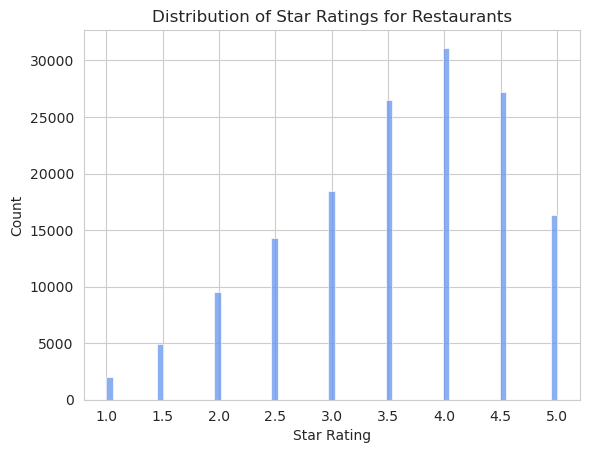

In [32]:
sns.histplot(df_business_data.stars, color = 'cornflowerblue')
plt.title('Distribution of Star Ratings for Restaurants')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()

### Review stars

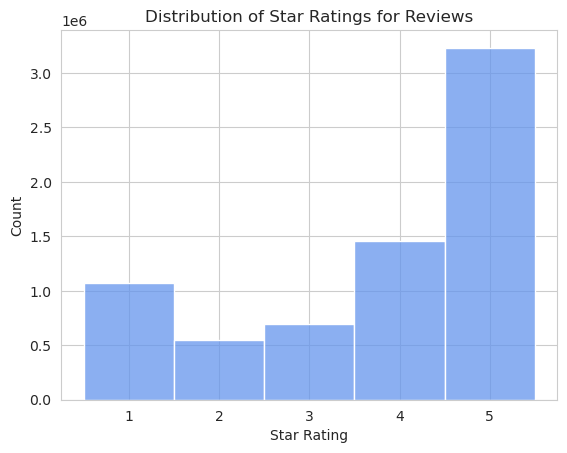

In [33]:
sns.histplot(df_review_data.stars, color = 'cornflowerblue', binwidth = 1, binrange = (0.5, 5.5))
plt.title('Distribution of Star Ratings for Reviews')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.xticks(range(1, 6))
plt.show()

### Business locations

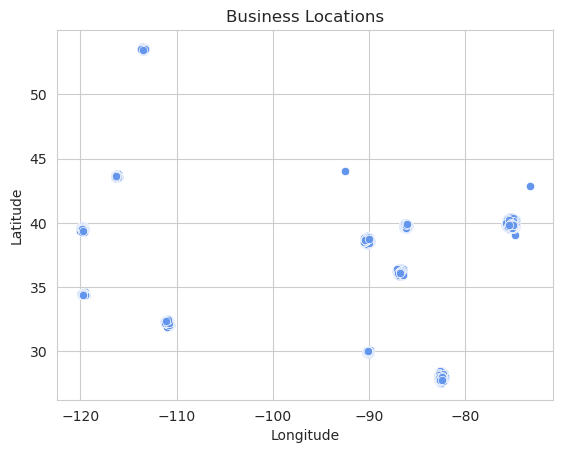

In [34]:
sns.scatterplot(data = df_business_data, x = 'longitude', y = 'latitude', color = 'cornflowerblue')
plt.title('Business Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [35]:
#fig = px.scatter_geo(df_business_data, 
#                     lat = 'latitude', lon = 'longitude',
#                     title = 'Business Locations')
#fig.update_geos(scope = 'usa')
#fig.show()

### Number of friends

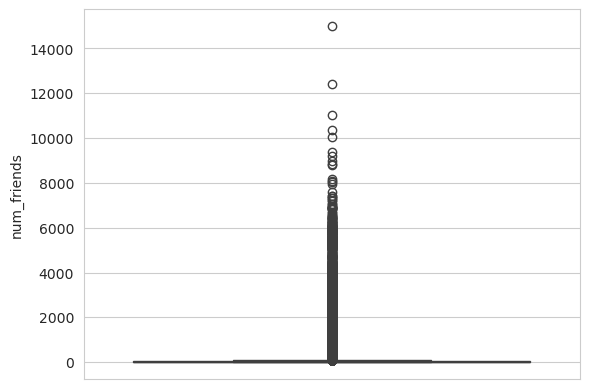

In [28]:
df_user_data['num_friends'] = df_user_data['friends'].apply(lambda x: len(x.split(',')) if x and x != 'None' else 0)

sns.boxplot(df_user_data.num_friends)
plt.show()

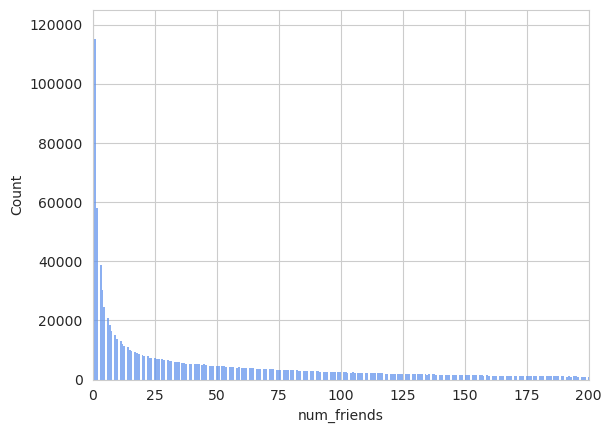

In [33]:
sns.histplot(df_user_data.num_friends, color = 'cornflowerblue')
plt.xlim(0, 200)
plt.ylim(0, 125000)
plt.show()

### Restaurant stars and review counts

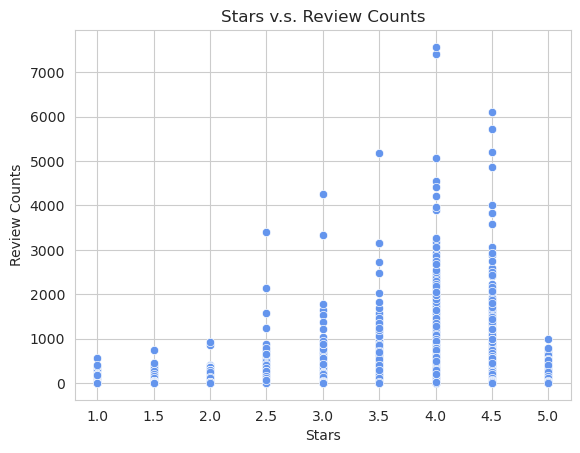

In [38]:
sns.scatterplot(data = df_business_data, x = 'stars', y = 'review_count', color = 'cornflowerblue')
plt.title('Stars v.s. Review Counts')
plt.xlabel('Stars')
plt.ylabel('Review Counts')
plt.show()

# Data Preprocessing

## Check duplicates

In [13]:
duplicates = df_review_data[df_review_data['review_id'].duplicated()]

In [14]:
print(duplicates)

Empty DataFrame
Columns: [review_id, user_id, business_id, stars, useful, funny, cool, text, date]
Index: []


In [15]:
duplicates = df_business_data[df_business_data['business_id'].duplicated()]

In [16]:
print(duplicates)

Empty DataFrame
Columns: [business_id, name, address, city, state, postal_code, latitude, longitude, stars, review_count, is_open, attributes, categories, hours]
Index: []


## Combine df

In [17]:
df_combined = pd.merge(df_review_data, df_business_data, on = 'business_id', how = 'left')

In [18]:
df_combined = df_combined.rename(columns = {
    'stars_x': 'review_stars',
    'stars_y': 'business_stars'
})

## Drop columns

In [19]:
df_dropped = df_combined.drop(columns = ['useful', 'funny', 'cool', 'text', 'date', 'name', 
                                         'address', 'postal_code', 'latitude', 'longitude',
                                         'is_open', 'hours'])

## Missing values

In [20]:
print_num_missing(df_dropped)

'review_id' column has 0 missing values
'user_id' column has 0 missing values
'business_id' column has 0 missing values
'review_stars' column has 0 missing values
'city' column has 0 missing values
'state' column has 0 missing values
'business_stars' column has 0 missing values
'review_count' column has 0 missing values
'attributes' column has 183723 missing values
'categories' column has 689 missing values


In [21]:
df = df_dropped.dropna(axis = 0, how = 'any')

In [22]:
print_num_missing(df)

'review_id' column has 0 missing values
'user_id' column has 0 missing values
'business_id' column has 0 missing values
'review_stars' column has 0 missing values
'city' column has 0 missing values
'state' column has 0 missing values
'business_stars' column has 0 missing values
'review_count' column has 0 missing values
'attributes' column has 0 missing values
'categories' column has 0 missing values


In [23]:
df.head()

,review_id,user_id,business_id,review_stars,city,state,business_stars,review_count,attributes,categories
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,North Wales,PA,3.0,169,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B..."
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,Philadelphia,PA,5.0,144,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...","Active Life, Cycling Classes, Trainers, Gyms, ..."
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,Tucson,AZ,3.5,47,"{'RestaurantsReservations': 'True', 'BusinessP...","Restaurants, Breakfast & Brunch"
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,Philadelphia,PA,4.0,181,"{'Caters': 'True', 'Ambience': '{'romantic': F...","Halal, Pakistani, Restaurants, Indian"
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,New Orleans,LA,4.0,32,"{'BusinessParking': '{'garage': False, 'street...","Sandwiches, Beer, Wine & Spirits, Bars, Food, ..."


# Feature Engineering

## Aggregate average user rating

In [24]:
df_avg_rating = df_review_data.groupby('user_id')['stars'].mean()

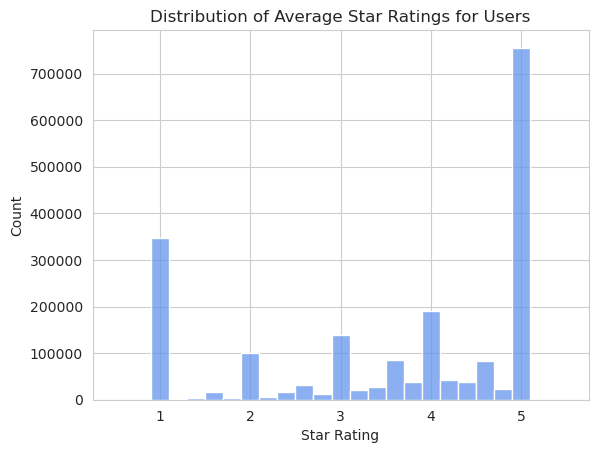

In [25]:
sns.histplot(df_avg_rating, color = 'cornflowerblue', binwidth = 0.2, binrange = (0.5, 5.5))
plt.title('Distribution of Average Star Ratings for Users')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.xticks(range(1, 6))
plt.show()

In [26]:
df = df.merge(df_avg_rating, on = 'user_id', how = 'left')
df = df.rename(columns = {'stars': 'avg_stars'})

## Aggregate number of friends

In [29]:
df = df.merge(df_user_data[['user_id', 'num_friends']], on = 'user_id', how = 'left')

In [30]:
df = df.dropna(axis = 0, how = 'any')

In [31]:
print_num_missing(df)

'review_id' column has 0 missing values
'user_id' column has 0 missing values
'business_id' column has 0 missing values
'review_stars' column has 0 missing values
'city' column has 0 missing values
'state' column has 0 missing values
'business_stars' column has 0 missing values
'review_count' column has 0 missing values
'attributes' column has 0 missing values
'categories' column has 0 missing values
'avg_stars' column has 0 missing values
'num_friends' column has 0 missing values


## Flatten categories

In [ ]:
business_subset = df_business_data[['business_id', 'categories']]
review_subset = df_review_data[['business_id', 'stars']]
merged_df = pd.merge(review_subset, business_subset, on='business_id', how='left')


merged_df = merged_df.dropna(subset=['categories'])
merged_df['categories'] = merged_df['categories'].str.split(', ')
category_list = []
for _, row in merged_df.iterrows():
    for category in row['categories']:
        category_list.append((category, row['stars']))
category_df = pd.DataFrame(category_list, columns=['category', 'stars'])
category_ratings = category_df.groupby('category')['stars'].mean().reset_index()
category_ratings = category_ratings.sort_values(by='stars', ascending=False)
print(category_ratings.head(10))


In [ ]:
review_counts = df_review_data.groupby('business_id').size().reset_index(name='review_count')
business_subset = df_business_data[['business_id', 'name']]
review_counts = pd.merge(review_counts, business_subset, on='business_id', how='left')
review_counts = review_counts.sort_values(by='review_count', ascending=False)
print(review_counts.head(10))

In [ ]:
import matplotlib.pyplot as plt

top_categories = category_ratings.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_categories['category'], top_categories['stars'], color='skyblue')
plt.xlabel('Average Star Rating')
plt.ylabel('Category')
plt.title('Top 10 Business Categories by Average Star Rating')
plt.gca().invert_yaxis()
plt.show()
